In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pyupbit

In [106]:
# 이동평균선 매매전략..

In [107]:
df = pyupbit.get_ohlcv('KRW-BTC', interval='minute60', count=200)
df

,open,high,low,close,volume,value
2022-04-26 07:00:00,50470000.0,50993000.0,50427000.0,50700000.0,201.560639,1.020826e+10
2022-04-26 08:00:00,50721000.0,50868000.0,50554000.0,50614000.0,145.642488,7.387062e+09
2022-04-26 09:00:00,50614000.0,50950000.0,50547000.0,50801000.0,180.667138,9.168041e+09
2022-04-26 10:00:00,50801000.0,50856000.0,50655000.0,50693000.0,127.499667,6.472850e+09
2022-04-26 11:00:00,50693000.0,50833000.0,50650000.0,50728000.0,92.713104,4.702804e+09
...,...,...,...,...,...,...
2022-05-04 10:00:00,48948000.0,48999000.0,48782000.0,48810000.0,118.994806,5.821656e+09
2022-05-04 11:00:00,48840000.0,48960000.0,48800000.0,48811000.0,109.233073,5.338466e+09
2022-05-04 12:00:00,48825000.0,48951000.0,48790000.0,48892000.0,90.941339,4.445181e+09
2022-05-04 13:00:00,48891000.0,48967000.0,48787000.0,48811000.0,126.290863,6.172321e+09


In [108]:
def get_returns_df(df, N=3, log=False):
    if log:
        return np.log(df/df.shift(N)).iloc[N-1:].fillna(0)
    else:
        return df.pct_change(N, fill_method=None).iloc[N-1:].fillna(0)
    
def get_cum_returns_df(return_df, log=False):
    if log:
        return np.exp(return_df.cumsum())
    else:
        return (1+return_df).cumprod()

In [109]:
df['sma_short'] = df['close'].rolling(5).mean()
df['sma_long'] = df['close'].rolling(20).mean()
df = df.dropna()
df.head()

,open,high,low,close,volume,value,sma_short,sma_long
2022-04-27 02:00:00,49114000.0,49114000.0,48500000.0,48853000.0,339.576580,1.654574e+10,49359400.0,50412050.0
2022-04-27 03:00:00,48853000.0,49006000.0,48703000.0,48941000.0,111.582080,5.451845e+09,49110800.0,50324100.0
2022-04-27 04:00:00,48941000.0,49043000.0,48376000.0,48865000.0,186.935606,9.104470e+09,48969200.0,50236650.0
2022-04-27 05:00:00,48868000.0,48945000.0,48300000.0,48641000.0,187.828816,9.122459e+09,48882800.0,50128650.0
2022-04-27 06:00:00,48650000.0,49039000.0,48547000.0,48963000.0,146.873936,7.177011e+09,48852600.0,50042150.0


In [110]:
df.loc[:, 'signal'] = np.where(df['sma_short'] >= df['sma_long'], 1, 0)
df

,open,high,low,close,volume,value,sma_short,sma_long,signal
2022-04-27 02:00:00,49114000.0,49114000.0,48500000.0,48853000.0,339.576580,1.654574e+10,49359400.0,50412050.0,0
2022-04-27 03:00:00,48853000.0,49006000.0,48703000.0,48941000.0,111.582080,5.451845e+09,49110800.0,50324100.0,0
2022-04-27 04:00:00,48941000.0,49043000.0,48376000.0,48865000.0,186.935606,9.104470e+09,48969200.0,50236650.0,0
2022-04-27 05:00:00,48868000.0,48945000.0,48300000.0,48641000.0,187.828816,9.122459e+09,48882800.0,50128650.0,0
2022-04-27 06:00:00,48650000.0,49039000.0,48547000.0,48963000.0,146.873936,7.177011e+09,48852600.0,50042150.0,0
...,...,...,...,...,...,...,...,...,...
2022-05-04 10:00:00,48948000.0,48999000.0,48782000.0,48810000.0,118.994806,5.821656e+09,48880800.0,49143100.0,0
2022-05-04 11:00:00,48840000.0,48960000.0,48800000.0,48811000.0,109.233073,5.338466e+09,48850800.0,49118150.0,0
2022-05-04 12:00:00,48825000.0,48951000.0,48790000.0,48892000.0,90.941339,4.445181e+09,48847600.0,49086900.0,0
2022-05-04 13:00:00,48891000.0,48967000.0,48787000.0,48811000.0,126.290863,6.172321e+09,48854400.0,49049800.0,0


In [111]:
df.head()

,open,high,low,close,volume,value,sma_short,sma_long,signal
2022-04-27 02:00:00,49114000.0,49114000.0,48500000.0,48853000.0,339.576580,1.654574e+10,49359400.0,50412050.0,0
2022-04-27 03:00:00,48853000.0,49006000.0,48703000.0,48941000.0,111.582080,5.451845e+09,49110800.0,50324100.0,0
2022-04-27 04:00:00,48941000.0,49043000.0,48376000.0,48865000.0,186.935606,9.104470e+09,48969200.0,50236650.0,0
2022-04-27 05:00:00,48868000.0,48945000.0,48300000.0,48641000.0,187.828816,9.122459e+09,48882800.0,50128650.0,0
2022-04-27 06:00:00,48650000.0,49039000.0,48547000.0,48963000.0,146.873936,7.177011e+09,48852600.0,50042150.0,0


In [112]:
df['return5'] = df.close.pct_change(5)
df.drop(['open','high','low','volume','value'], axis=1, inplace=True)

In [113]:
df.dropna(inplace=True)

In [114]:
df['str_return'] = df['signal']*df['return5']

In [115]:
df['cum_str_return'] = (df['str_return'] + 1).cumprod()

<AxesSubplot:>

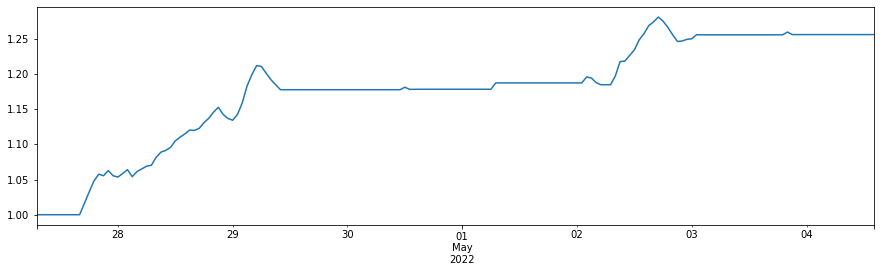

In [116]:
df['cum_str_return'].plot(figsize=(15,4))

In [117]:
df['cum_str_return'].head()

2022-04-27 07:00:00    1.0
2022-04-27 08:00:00    1.0
2022-04-27 09:00:00    1.0
2022-04-27 10:00:00    1.0
2022-04-27 11:00:00    1.0
Name: cum_str_return, dtype: float64

In [118]:
df['cum_str_return'].tail()

2022-05-04 10:00:00    1.256082
2022-05-04 11:00:00    1.256082
2022-05-04 12:00:00    1.256082
2022-05-04 13:00:00    1.256082
2022-05-04 14:00:00    1.256082
Name: cum_str_return, dtype: float64

In [ ]:
# 변동성 돌파 전략..

In [119]:
df = pyupbit.get_ohlcv('KRW-BTC', interval='minute60', count=200)
df

,open,high,low,close,volume,value
2022-04-26 07:00:00,50470000.0,50993000.0,50427000.0,50700000.0,201.560639,1.020826e+10
2022-04-26 08:00:00,50721000.0,50868000.0,50554000.0,50614000.0,145.642488,7.387062e+09
2022-04-26 09:00:00,50614000.0,50950000.0,50547000.0,50801000.0,180.667138,9.168041e+09
2022-04-26 10:00:00,50801000.0,50856000.0,50655000.0,50693000.0,127.499667,6.472850e+09
2022-04-26 11:00:00,50693000.0,50833000.0,50650000.0,50728000.0,92.713104,4.702804e+09
...,...,...,...,...,...,...
2022-05-04 10:00:00,48948000.0,48999000.0,48782000.0,48810000.0,118.994806,5.821656e+09
2022-05-04 11:00:00,48840000.0,48960000.0,48800000.0,48811000.0,109.233073,5.338466e+09
2022-05-04 12:00:00,48825000.0,48951000.0,48790000.0,48892000.0,90.941339,4.445181e+09
2022-05-04 13:00:00,48891000.0,48967000.0,48787000.0,48811000.0,126.290863,6.172321e+09


In [120]:
df['diff'] = df['high'] - df['low']

In [121]:
k = 0.6

df['target_price'] = df['open'] + df['diff'].shift() * k

In [122]:
df['signal'] = df['high'] >= df['target_price']

In [125]:
df['signal'] = df['signal'].astype(int)

In [126]:
df['return5'] = df.close.pct_change(5)

In [129]:
df['str_return'] = df['return5']*df['signal']

In [131]:
df.dropna(inplace=True)

In [132]:
df['cum_str_return'] = (df['str_return']+1).cumprod()

<AxesSubplot:>

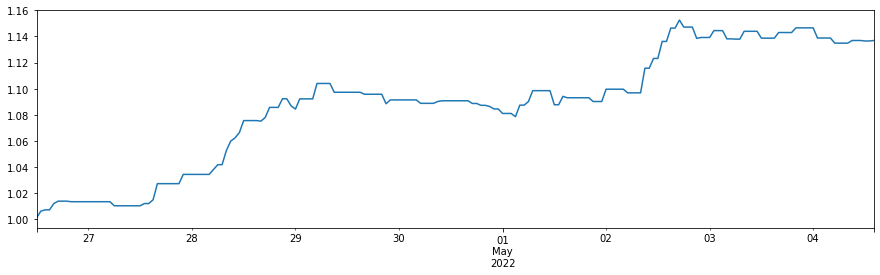

In [135]:
df['cum_str_return'].plot(figsize=(15,4))

In [136]:
# mean_reversion

In [137]:
df = pyupbit.get_ohlcv('KRW-BTC', count=500)
df.head()

,open,high,low,close,volume,value
2020-12-21 09:00:00,25890000.0,26588000.0,24600000.0,25387000.0,13640.523459,3.502190e+11
2020-12-22 09:00:00,25387000.0,26828000.0,24925000.0,26776000.0,7994.073583,2.061332e+11
2020-12-23 09:00:00,26776000.0,27070000.0,25600000.0,26380000.0,12398.447606,3.283046e+11
2020-12-24 09:00:00,26380000.0,26608000.0,25774000.0,26503000.0,6661.237365,1.745703e+11
2020-12-25 09:00:00,26503000.0,27271000.0,26171000.0,27122000.0,7979.827412,2.135000e+11


In [146]:
window=20

df.loc[:,'sma_20'] = df['close'].rolling(window).mean()

rolling_std = df['close'].rolling(window).std()

df['higher_band'] = df['sma_20'] + rolling_std*2
df['lower_band'] = df['sma_20'] - rolling_std*2

In [147]:
df.dropna(inplace=True)

<AxesSubplot:>

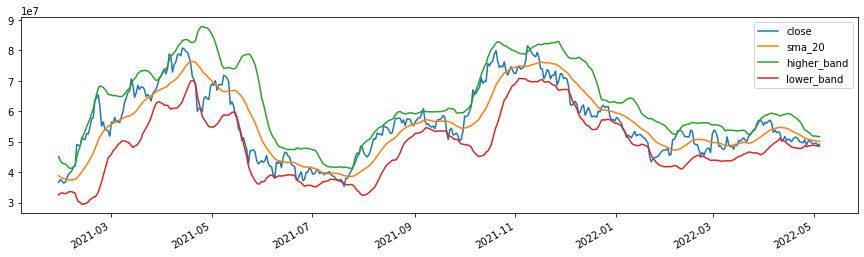

In [148]:
df[['close','sma_20','higher_band', 'lower_band']].plot(figsize=(15,4))

In [150]:
pos1 = np.where(df['close'] <= df['lower_band'], 1, 0)
pos2 = np.where(df['close'] >= df['higher_band'], -1, 0)
df.loc[:, 'position'] = pos1 + pos2


In [151]:
df['rtn_5'] = df.close.pct_change(5)

In [152]:
df['str_rtn'] = df['position'] * df['rtn_5']
df

,open,high,low,close,volume,value,sma_20,higher_band,lower_band,position,rtn_5,str_rtn
2021-01-28 09:00:00,34293000.0,37186000.0,33726000.0,36624000.0,9452.485501,3.346659e+11,38806300.0,4.511011e+07,3.250249e+07,0,NaN,NaN
2021-01-29 09:00:00,36631000.0,41072000.0,35514000.0,37523000.0,33565.738008,1.297497e+12,38396550.0,4.381140e+07,3.298170e+07,0,NaN,NaN
2021-01-30 09:00:00,37523000.0,38201000.0,36230000.0,37087000.0,12481.606637,4.651404e+11,38080700.0,4.297791e+07,3.318349e+07,0,NaN,NaN
2021-01-31 09:00:00,37039000.0,37633000.0,35800000.0,36408000.0,11396.064469,4.192026e+11,37896400.0,4.275185e+07,3.304095e+07,0,NaN,NaN
2021-02-01 09:00:00,36408000.0,38161000.0,35907000.0,36618000.0,13783.136363,5.084881e+11,37798450.0,4.267508e+07,3.292182e+07,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30 09:00:00,49731000.0,49953000.0,49243000.0,49283000.0,2078.698534,1.032479e+11,50333950.0,5.182196e+07,4.884594e+07,0,-0.026297,-0.0
2022-05-01 09:00:00,49283000.0,49620000.0,48500000.0,49383000.0,2882.994540,1.416309e+11,50300600.0,5.184426e+07,4.875694e+07,0,0.012424,0.0
2022-05-02 09:00:00,49383000.0,50210000.0,49110000.0,49520000.0,2614.563560,1.299316e+11,50247750.0,5.182361e+07,4.867189e+07,0,-0.008688,-0.0
2022-05-03 09:00:00,49501000.0,49678000.0,48638000.0,48777000.0,2755.309315,1.356670e+11,50101600.0,5.165234e+07,4.855086e+07,0,-0.035647,-0.0


In [153]:
df['cum_str_rtn'] = (df['str_rtn'] + 1).cumprod()
df.head()

,open,high,low,close,volume,value,sma_20,higher_band,lower_band,position,rtn_5,str_rtn,cum_str_rtn
2021-01-28 09:00:00,34293000.0,37186000.0,33726000.0,36624000.0,9452.485501,3.346659e+11,38806300.0,4.511011e+07,3.250249e+07,0,NaN,NaN,NaN
2021-01-29 09:00:00,36631000.0,41072000.0,35514000.0,37523000.0,33565.738008,1.297497e+12,38396550.0,4.381140e+07,3.298170e+07,0,NaN,NaN,NaN
2021-01-30 09:00:00,37523000.0,38201000.0,36230000.0,37087000.0,12481.606637,4.651404e+11,38080700.0,4.297791e+07,3.318349e+07,0,NaN,NaN,NaN
2021-01-31 09:00:00,37039000.0,37633000.0,35800000.0,36408000.0,11396.064469,4.192026e+11,37896400.0,4.275185e+07,3.304095e+07,0,NaN,NaN,NaN
2021-02-01 09:00:00,36408000.0,38161000.0,35907000.0,36618000.0,13783.136363,5.084881e+11,37798450.0,4.267508e+07,3.292182e+07,0,NaN,NaN,NaN


In [155]:
df.dropna(inplace=True)

<AxesSubplot:>

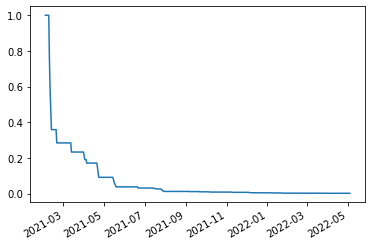

In [158]:
df['cum_str_rtn'].plot()

In [169]:
# momentum

In [186]:
df = pyupbit.get_ohlcv('KRW-BTC', count=200)
df.head()

,open,high,low,close,volume,value
2021-10-17 09:00:00,74806000.0,76200000.0,74008000.0,75933000.0,5403.948537,4.049907e+11
2021-10-18 09:00:00,75933000.0,77276000.0,74193000.0,76546000.0,8312.737819,6.326885e+11
2021-10-19 09:00:00,76541000.0,79285000.0,75925000.0,78776000.0,9018.170951,6.964016e+11
2021-10-20 09:00:00,78776000.0,81750000.0,78001000.0,79917000.0,14472.097423,1.152411e+12
2021-10-21 09:00:00,79919000.0,80811000.0,76324000.0,76396000.0,15551.933346,1.225372e+12


In [187]:
df['rtn_5'] = df.close.pct_change(5)

In [188]:
momentum_window=20
target_return = 0.05

df['rtn'] = df.close.pct_change(momentum_window)

df.loc[:, 'position'] = np.where(df['rtn'] > target_return, 1, 0)

In [189]:
df.dropna(inplace=True)

In [190]:
df['str_rtn'] = df['position'] * df['rtn_5']

In [191]:
df['cum_str_rtn'] = (df['str_rtn'] + 1).cumprod()

<AxesSubplot:>

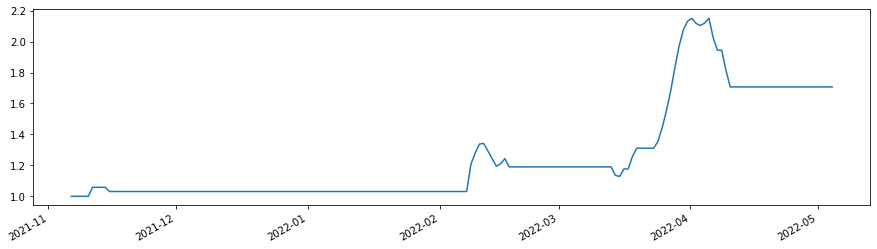

In [192]:
df['cum_str_rtn'].plot(figsize=(15,4))